# **Time Series**

In [43]:
import pandas as pd
import seaborn as sns
sns.set()

In [5]:
pd.date_range('2019-04-01','2019-07-23',periods = 10)

DatetimeIndex(['2019-04-01 00:00:00', '2019-04-13 13:20:00',
               '2019-04-26 02:40:00', '2019-05-08 16:00:00',
               '2019-05-21 05:20:00', '2019-06-02 18:40:00',
               '2019-06-15 08:00:00', '2019-06-27 21:20:00',
               '2019-07-10 10:40:00', '2019-07-23 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [42]:
df = pd.DataFrame({'x': range(200)}, index = pd.date_range('2019-03-03', periods=200))

In [45]:
#aggréger par mois / label : détermine le début de la semaine : cf : doc
#resample <=> groupby
df_plot = df.resample('M',label='left').agg(['mean','std'])

In [18]:
#maille plus petite
df.resample('12H').mean().head(5)

,x
2019-03-03 00:00:00,0.0
2019-03-03 12:00:00,NaN
2019-03-04 00:00:00,1.0
2019-03-04 12:00:00,NaN
2019-03-05 00:00:00,2.0


In [22]:
df.reindex(pd.date_range('2019-03-03','2019-04-06', periods=12)).head(5)

,x
2019-03-03 00:00:00.000000000,0.0
2019-03-06 02:10:54.545454545,NaN
2019-03-09 04:21:49.090909090,NaN
2019-03-12 06:32:43.636363636,NaN
2019-03-15 08:43:38.181818181,NaN


In [23]:
#init
df2 = pd.DataFrame({'x': range(200)}, index = pd.date_range('2019-03-03', periods=200))

In [25]:
#shift permet de décaler une colonne d'une cellule vers le bas / si param freq = décale l'index
df2.shift()
df2.x / df2.shift().x

2019-03-03         NaN
2019-03-04         inf
2019-03-05    2.000000
2019-03-06    1.500000
2019-03-07    1.333333
                ...   
2019-09-14    1.005155
2019-09-15    1.005128
2019-09-16    1.005102
2019-09-17    1.005076
2019-09-18    1.005051
Freq: D, Name: x, Length: 200, dtype: float64

In [35]:
df_join = df2.join(df2.shift(1, freq="D"), lsuffix="_a", rsuffix="_b")
df_join["lapin"] = df_join["x_a"]*5
df_join.head(5)

,x_a,x_b,lapin
2019-03-03,0,NaN,0
2019-03-04,1,0.0,5
2019-03-05,2,1.0,10
2019-03-06,3,2.0,15
2019-03-07,4,3.0,20


In [33]:
#Define timezone
df2.head().tz_localize('Europe/Paris').tz_convert('Asia/Tokyo')

,x
2019-03-03 08:00:00+09:00,0
2019-03-04 08:00:00+09:00,1
2019-03-05 08:00:00+09:00,2
2019-03-06 08:00:00+09:00,3
2019-03-07 08:00:00+09:00,4


# **DataVisualisation : time series** 

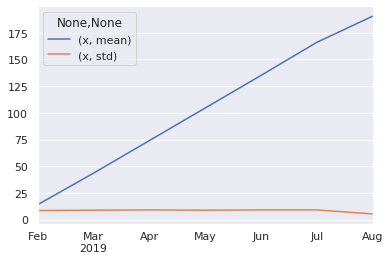

In [47]:
df.loc['date'].plot(linestyle = , marker, color)

In [ ]:
#fenêtre glissante pour par exemple calculer une moyenne et obtenir une fonction continue
df.rolling(window = "7D", min_periods = 1).mean